<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import nltk
import spacy
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# !pip install pyspellchecker
from spellchecker import SpellChecker
pd.options.mode.chained_assignment = None

Load the data

In [196]:
file_path = "/content/train.csv"
df = pd.read_csv(file_path)
df = df.dropna()
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


Plot the count for each target

Distribution of the target:


0    2884
1    2196
Name: target, dtype: int64

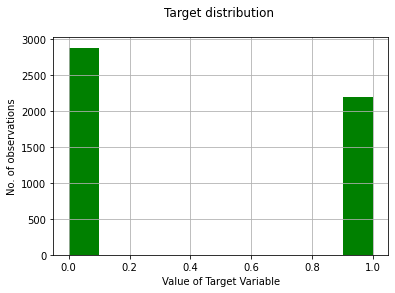

In [237]:
#Distrubution of the target variable

fig = df['target'].hist(orientation='vertical', color='green')
fig.set_xlabel("Value of Target Variable")
fig.set_ylabel("No. of observations")
fig.set_title("Target distribution \n")

print('Distribution of the target:')
df['target'].value_counts()

Print the unique keywords

In [198]:
df_keywords = df.iloc[:, 1]
keywords = list(df_keywords.dropna())
unique_keywords = set(keywords)
unique_keywords

{'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

Plot the count of each keyword

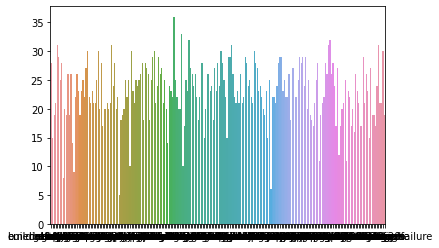

In [199]:
dict_count = {}
for i in unique_keywords:
  count = keywords.count(i)
  dict_count[i] = count
keys = list(dict_count.keys())
values = list(dict_count.values())
sns.barplot(x=keys, y=values)

Is there any correlation of the length of a tweet with its target. Try to visualize

In [200]:
length=df['text'].str.len()
length

31       55
32       67
33       82
34       34
35       76
       ... 
7575     51
7577    107
7579    107
7580     93
7581    104
Name: text, Length: 5080, dtype: int64

In [235]:
print("Maximum Tweet Length:",end=" ")
print(df['text'].str.len().max())
print("Minimum Tweet Length:",end=" ")
print(df['text'].str.len().min())
print("Average Tweet Length:",end=" ")
print(df['text'].str.len().mean())

Maximum Tweet Length: 132
Minimum Tweet Length: 0
Average Tweet Length: 37.70393700787402


In [236]:
column_1 = df["target"]
column_2 = length
correlation = column_1.corr(column_2)
print("Correlation", correlation*100)

Correlation 16.166298308946054


Print the number of null values in each column

In [203]:
headers = list(df.columns)
for i in range(0, 5):
  print("Number of Null Values in", headers[i] , "column are", df.iloc[:, i].isna().sum())

Number of Null Values in id column are 0
Number of Null Values in keyword column are 0
Number of Null Values in location column are 0
Number of Null Values in text column are 0
Number of Null Values in target column are 0


Remove the null values

In [204]:
df = df.dropna()
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



In [205]:
df["text"] = df["text"].str.lower()
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy. #metal #rt h...,0
33,50,ablaze,AFRICA,#africanbaze: breaking news:nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",crying out for more! set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0


In [206]:
def remove_spaces(text):
  return re.sub(' +',' ',text)
df["text"] = df["text"].apply(lambda text: remove_spaces(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy. #metal #rt h...,0
33,50,ablaze,AFRICA,#africanbaze: breaking news:nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",crying out for more! set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,on the bright side i wrecked http://t.co/uea0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... he's gone. you can relax. i thoug...,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#fx #forex #trading cramer: iger's 3 words tha...,0


In [207]:
PUNCT_TO_REMOVE = "!#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`0123456789"
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohyc,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt http...,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,on the bright side i wrecked httptcoueatxrhys,0
7577,10829,wrecked,#NewcastleuponTyne #UK,widda hes gone you can relax i thought the wi...,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and theyve pretty muc...,0
7580,10832,wrecked,London,fx forex trading cramer igers words that wrec...,0


In [208]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df["text"] = df["text"].apply(lambda text: remove_emoji(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohyc,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt http...,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,on the bright side i wrecked httptcoueatxrhys,0
7577,10829,wrecked,#NewcastleuponTyne #UK,widda hes gone you can relax i thought the wi...,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and theyve pretty muc...,0
7580,10832,wrecked,London,fx forex trading cramer igers words that wrec...,0


In [209]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
df["text"] = df["text"].apply(lambda text: remove_emoticons(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohyc,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt http...,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,on the bright side i wrecked httptcoueatxrhys,0
7577,10829,wrecked,#NewcastleuponTyne #UK,widda hes gone you can relax i thought the wi...,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and theyve pretty muc...,0
7580,10832,wrecked,London,fx forex trading cramer igers words that wrec...,0


In [210]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df["text"] = df["text"].apply(lambda text: remove_urls(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohyc,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt http...,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,on the bright side i wrecked httptcoueatxrhys,0
7577,10829,wrecked,#NewcastleuponTyne #UK,widda hes gone you can relax i thought the wi...,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and theyve pretty muc...,0
7580,10832,wrecked,London,fx forex trading cramer igers words that wrec...,0


In [211]:
nltk.download('words')
words = set(nltk.corpus.words.words())
def remove_non_english_words(text):
  text=" ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
  return text
df["text"] = df["text"].apply(lambda text: remove_non_english_words(text))
df

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,id,keyword,location,text,target
31,48,ablaze,Birmingham,wholesale ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal,0
33,50,ablaze,AFRICA,breaking flag set ablaze in aba,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,on the bright side i,0
7577,10829,wrecked,#NewcastleuponTyne #UK,gone you can relax i thought the wife who her ...,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and pretty much all b...,0
7580,10832,wrecked,London,trading that stock,0


In [212]:
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [213]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,wholesale ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,always try bring heavy metal,0
33,50,ablaze,AFRICA,breaking flag set ablaze aba,1
34,52,ablaze,"Philadelphia, PA",crying set ablaze,0
35,53,ablaze,"London, UK",plus side look sky last night ablaze,0
...,...,...,...,...,...
7575,10826,wrecked,TN,bright side,0
7577,10829,wrecked,#NewcastleuponTyne #UK,gone relax thought wife cake goner mind whoops,0
7579,10831,wrecked,"Vancouver, Canada",three days work pretty much family one,0
7580,10832,wrecked,London,trading stock,0


In [214]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
df["text"] = df["text"].apply(lambda text: correct_spellings(text))
df

,id,keyword,location,text,target
31,48,ablaze,Birmingham,wholesale ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,always try bring heavy metal,0
33,50,ablaze,AFRICA,breaking flag set ablaze aba,1
34,52,ablaze,"Philadelphia, PA",crying set ablaze,0
35,53,ablaze,"London, UK",plus side look sky last night ablaze,0
...,...,...,...,...,...
7575,10826,wrecked,TN,bright side,0
7577,10829,wrecked,#NewcastleuponTyne #UK,gone relax thought wife cake goner mind whoops,0
7579,10831,wrecked,"Vancouver, Canada",three days work pretty much family one,0
7580,10832,wrecked,London,trading stock,0


Plot a word cloud of real target and fake target

Figure for class 0


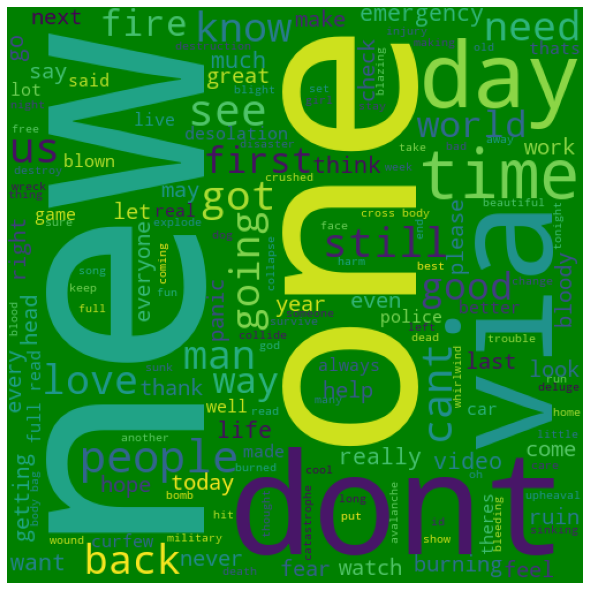

Figure for class 1


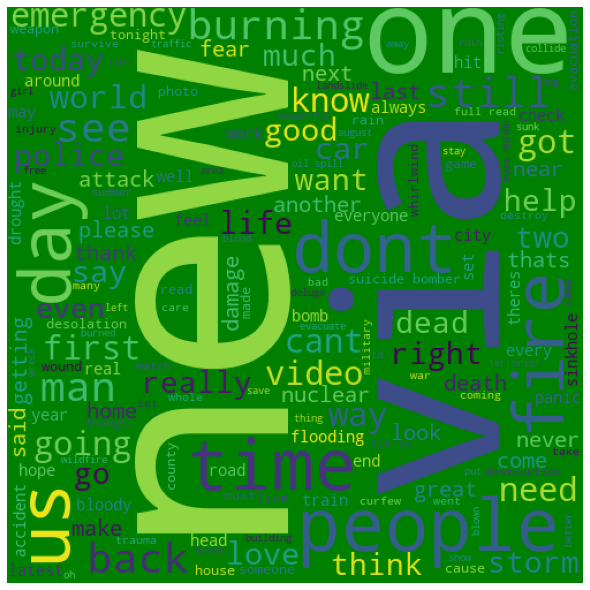

In [234]:
comment_words = ''
text = list(df.iloc[:, 3])
target = list(df.iloc[:, 4])

for i in range(0, len(text)):
    val = text[i]
    if (target[i] == 0):
      val = str(val)
      tokens = val.split()
      comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='green',
                min_font_size = 9).generate(comment_words)
  
=print("Figure for class 0")                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

for i in range(0, len(text)):
    val = text[i]
    if (target[i] == 1):
      val = str(val)
      tokens = val.split()
      comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='green',
                min_font_size = 9).generate(comment_words)
  
print("Figure for class 1")                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Keep only text and target column in the dataset

In [216]:
data = df.iloc[:, 3:5]
new_df = pd.DataFrame(data)
new_df

,text,target
31,wholesale ablaze,1
32,always try bring heavy metal,0
33,breaking flag set ablaze aba,1
34,crying set ablaze,0
35,plus side look sky last night ablaze,0
...,...,...
7575,bright side,0
7577,gone relax thought wife cake goner mind whoops,0
7579,three days work pretty much family one,0
7580,trading stock,0


Split data into train and validation

In [217]:
X = new_df["text"]
y = new_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 37)

Print the count of unique words

In [218]:
text = list(new_df["text"])
text = set(text)
unique_words = []

for i in text:
  words = i.split(" ")
  unique_words.extend(set(words))
unique_words = set(unique_words)
len(unique_words)

5247

Compute the Term-Document Matrix (TDM) for all classes.

Print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [219]:
vectorizer = CountVectorizer()
X_trainCV = vectorizer.fit_transform(X_train)
X_trainCV = X_trainCV.toarray()
features = vectorizer.get_feature_names()
count_list = X_trainCV.sum(axis=0)
df_tdm = pd.DataFrame(data = X_trainCV, columns = features)
df_tdm

,aba,abandon,abandoned,ability,abject,ablaze,able,abortion,absolute,absolutely,absurd,absurdly,abuse,accept,access,accident,accidentally,accidently,according,account,accuracy,accused,accustomed,achievement,aching,acid,ackman,acoustic,acquire,acquired,acronym,across,act,acting,action,activate,activist,activity,actor,actress,...,writing,written,wrong,wrote,wrought,wy,ya,yahoo,yard,yea,yeah,year,yell,yelling,yellow,yellows,yelp,yep,yes,yesterday,yet,yo,yoga,york,yorker,youd,young,younger,youth,youve,yr,yuan,zar,zero,zimbabwe,zip,zodiac,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [220]:
#DataFrame with target = Class 1
df_class1 = new_df.copy(deep = True)
text = list(new_df.iloc[:, 0])
target = list(new_df.iloc[:, 1])
indices = df_class1.index
for i in range(0, len(target)):
  if(target[i] == 0):
    df_class1.drop(indices[i], inplace = True)
df_class1

,text,target
31,wholesale ablaze,1
33,breaking flag set ablaze aba,1
37,office set ablaze,1
46,west burned ablaze alone,1
50,man shot home set ablaze,1
...,...,...
7541,wreckage conclusively confirmed,1
7542,wreckage conclusively confirmed missing flight...,1
7543,wreckage conclusively confirmed,1
7552,home land,1


In [221]:
vectorizer = CountVectorizer()
class1CV = vectorizer.fit_transform(df_class1["text"])
class1CV = class1CV.toarray()
features_1 = vectorizer.get_feature_names()
df_tdm_class1 = pd.DataFrame(data = class1CV, columns = features_1)
df_tdm_class1

,aba,abandon,abandoned,ablaze,able,abortion,absolute,absurd,abuse,accept,accident,accidentally,according,account,accuracy,accused,acid,acquire,acquired,across,act,acting,action,activist,activity,actress,actually,acute,add,added,addict,address,adjust,adjustable,administration,adult,advance,adverse,advised,advisory,...,worth,would,wouldnt,wound,wounded,wounds,wow,wraith,wrap,wrapped,wreak,wreck,wreckage,wrong,wrought,wy,ya,yahoo,yard,yeah,year,yelling,yellow,yelp,yep,yes,yesterday,yet,yo,york,yorker,youd,young,younger,youth,youve,yr,zeal,zombie,zone
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [222]:
#DataFrame with target = Class 0
df_class0 = new_df.copy(deep = True)
text = list(new_df.iloc[:, 0])
target = list(new_df.iloc[:, 1])
indices = df_class0.index
for i in range(0, len(target)):
  if(target[i] == 1):
    df_class0.drop(indices[i], inplace = True)
print(df_class0)

                                                text  target
32                      always try bring heavy metal       0
34                                 crying set ablaze       0
35              plus side look sky last night ablaze       0
36     built much around new doubt set ablaze season       0
39                                       ablaze lord       0
...                                              ...     ...
7575                                     bright side       0
7577  gone relax thought wife cake goner mind whoops       0
7579          three days work pretty much family one       0
7580                                   trading stock       0
7581       great atmosphere lion gig tonight hearing       0

[2884 rows x 2 columns]


In [223]:
vectorizer = CountVectorizer()
class0CV = vectorizer.fit_transform(df_class0["text"])
class0CV = class0CV.toarray()
features_0 = vectorizer.get_feature_names()
df_tdm_class0 = pd.DataFrame(data = class0CV, columns = features_0)
df_tdm_class0

,aba,abandon,ability,abject,ablaze,able,abomination,abortion,absolutely,abstract,absurdly,abuse,accept,access,accident,accidentally,accidently,according,account,accused,accustomed,achieve,achievement,aching,ackman,acoustic,acronym,across,act,actin,acting,action,activate,active,activity,actor,actual,actually,ad,add,...,wrist,wristband,write,writer,writing,written,wrong,wrote,wy,ya,yahoo,yea,yeah,year,yell,yelling,yellow,yellows,yes,yesterday,yet,yo,yoga,yolk,yor,york,yorker,youd,young,youth,youve,yuan,zar,zero,zimbabwe,zip,zodiac,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Frequency of words in class 0 and 1

In [224]:
count_list_1 = class1CV.sum(axis=0)
frequency_class1 = dict(zip(features_1,count_list_1))
frequency_class1

{'aba': 5,
 'abandon': 1,
 'abandoned': 7,
 'ablaze': 11,
 'able': 3,
 'abortion': 1,
 'absolute': 1,
 'absurd': 1,
 'abuse': 2,
 'accept': 1,
 'accident': 52,
 'accidentally': 3,
 'according': 2,
 'account': 6,
 'accuracy': 1,
 'accused': 1,
 'acid': 2,
 'acquire': 1,
 'acquired': 1,
 'across': 10,
 'act': 6,
 'acting': 1,
 'action': 8,
 'activist': 1,
 'activity': 2,
 'actress': 2,
 'actually': 8,
 'acute': 3,
 'add': 1,
 'added': 3,
 'addict': 1,
 'address': 2,
 'adjust': 1,
 'adjustable': 1,
 'administration': 1,
 'adult': 1,
 'advance': 3,
 'adverse': 1,
 'advised': 2,
 'advisory': 7,
 'affect': 1,
 'affected': 23,
 'affecting': 1,
 'affiliation': 2,
 'affliction': 1,
 'afloat': 1,
 'afraid': 1,
 'afternoon': 7,
 'age': 1,
 'ago': 13,
 'agree': 5,
 'agreed': 2,
 'ahead': 4,
 'aid': 6,
 'aim': 5,
 'aint': 4,
 'air': 20,
 'aircraft': 13,
 'airing': 1,
 'airlift': 1,
 'airplane': 22,
 'airport': 24,
 'aka': 1,
 'al': 2,
 'alameda': 1,
 'alarm': 11,
 'alarmed': 2,
 'alarming': 1,
 'al

In [225]:
count_list_0 = class0CV.sum(axis=0)
frequency_class0 = dict(zip(features_0,count_list_0))
frequency_class0

{'aba': 6,
 'abandon': 2,
 'ability': 2,
 'abject': 1,
 'ablaze': 11,
 'able': 5,
 'abomination': 1,
 'abortion': 1,
 'absolutely': 7,
 'abstract': 1,
 'absurdly': 1,
 'abuse': 3,
 'accept': 1,
 'access': 2,
 'accident': 15,
 'accidentally': 1,
 'accidently': 1,
 'according': 4,
 'account': 5,
 'accused': 2,
 'accustomed': 2,
 'achieve': 1,
 'achievement': 1,
 'aching': 1,
 'ackman': 1,
 'acoustic': 2,
 'acronym': 1,
 'across': 5,
 'act': 5,
 'actin': 1,
 'acting': 1,
 'action': 5,
 'activate': 1,
 'active': 1,
 'activity': 2,
 'actor': 1,
 'actual': 4,
 'actually': 14,
 'ad': 2,
 'add': 5,
 'added': 10,
 'addiction': 1,
 'addition': 1,
 'address': 2,
 'adjuster': 1,
 'administration': 1,
 'administrative': 1,
 'admit': 2,
 'adoptive': 1,
 'adorable': 1,
 'adult': 3,
 'advanced': 1,
 'advice': 1,
 'affair': 1,
 'affected': 1,
 'affecting': 1,
 'afraid': 2,
 'afterhours': 1,
 'afterlife': 1,
 'aftershock': 12,
 'afterwards': 1,
 'agalloch': 1,
 'age': 3,
 'agency': 1,
 'agent': 1,
 'agg

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

Total frequency

In [238]:
print("Sum of unique words in target 0",end=": ")
print(len(features_0))
print("Sum of unique words in target 1: ",end="")
print(len(features_1))

Sum of unique words in target 0: 4060
Sum of unique words in target 1: 3081


In [227]:
print(len(features_1)+len(features_0))

7141


In [228]:
print(len(features))

4731


Calculate the probability for each word in a given class.

Class 0

In [229]:
total_words = 0
for i in range(0, len(features)):
  total_words = total_words + count_list[i]
P_0 = []
for i in range(0, len(features_0)):
  P_0.append(count_list_0[i])
for i in range(0, len(features_0)):
  P_0[i] = P_0[i]/total_words
P0 = dict(zip(features_0, P_0))
print("Probability of each word in 0th class is - ")
print(P0)

Probability of each word in 0th class is - 
{'aba': 0.00025471217524197657, 'abandon': 8.490405841399219e-05, 'ability': 8.490405841399219e-05, 'abject': 4.2452029206996094e-05, 'ablaze': 0.00046697232127695704, 'able': 0.00021226014603498047, 'abomination': 4.2452029206996094e-05, 'abortion': 4.2452029206996094e-05, 'absolutely': 0.00029716420444897266, 'abstract': 4.2452029206996094e-05, 'absurdly': 4.2452029206996094e-05, 'abuse': 0.00012735608762098828, 'accept': 4.2452029206996094e-05, 'access': 8.490405841399219e-05, 'accident': 0.0006367804381049414, 'accidentally': 4.2452029206996094e-05, 'accidently': 4.2452029206996094e-05, 'according': 0.00016980811682798438, 'account': 0.00021226014603498047, 'accused': 8.490405841399219e-05, 'accustomed': 8.490405841399219e-05, 'achieve': 4.2452029206996094e-05, 'achievement': 4.2452029206996094e-05, 'aching': 4.2452029206996094e-05, 'ackman': 4.2452029206996094e-05, 'acoustic': 8.490405841399219e-05, 'acronym': 4.2452029206996094e-05, 'ac

Class 1

In [230]:
P_1 = []
for i in range(0, len(features_1)):
  P_1.append(count_list_1[i])
for i in range(0, len(features_1)):
  P_1[i] = P_1[i]/total_words
P1 = dict(zip(features_1, P_1))
print("Probability of each word in 0th class is - ")
print(P1)

Probability of each word in 0th class is - 
{'aba': 0.00021226014603498047, 'abandon': 4.2452029206996094e-05, 'abandoned': 0.00029716420444897266, 'ablaze': 0.00046697232127695704, 'able': 0.00012735608762098828, 'abortion': 4.2452029206996094e-05, 'absolute': 4.2452029206996094e-05, 'absurd': 4.2452029206996094e-05, 'abuse': 8.490405841399219e-05, 'accept': 4.2452029206996094e-05, 'accident': 0.002207505518763797, 'accidentally': 0.00012735608762098828, 'according': 8.490405841399219e-05, 'account': 0.00025471217524197657, 'accuracy': 4.2452029206996094e-05, 'accused': 4.2452029206996094e-05, 'acid': 8.490405841399219e-05, 'acquire': 4.2452029206996094e-05, 'acquired': 4.2452029206996094e-05, 'across': 0.00042452029206996094, 'act': 0.00025471217524197657, 'acting': 4.2452029206996094e-05, 'action': 0.00033961623365596876, 'activist': 4.2452029206996094e-05, 'activity': 8.490405841399219e-05, 'actress': 8.490405841399219e-05, 'actually': 0.00033961623365596876, 'acute': 0.00012735608

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

In [231]:
vectorizer = CountVectorizer()
X_testCV = vectorizer.fit_transform(X_test)
X_testCV = X_testCV.toarray()
features_test = vectorizer.get_feature_names()
count_list_test = X_testCV.sum(axis=0)
frequency_test = dict(zip(features_0,count_list_0))
frequency_test

{'aba': 6,
 'abandon': 2,
 'ability': 2,
 'abject': 1,
 'ablaze': 11,
 'able': 5,
 'abomination': 1,
 'abortion': 1,
 'absolutely': 7,
 'abstract': 1,
 'absurdly': 1,
 'abuse': 3,
 'accept': 1,
 'access': 2,
 'accident': 15,
 'accidentally': 1,
 'accidently': 1,
 'according': 4,
 'account': 5,
 'accused': 2,
 'accustomed': 2,
 'achieve': 1,
 'achievement': 1,
 'aching': 1,
 'ackman': 1,
 'acoustic': 2,
 'acronym': 1,
 'across': 5,
 'act': 5,
 'actin': 1,
 'acting': 1,
 'action': 5,
 'activate': 1,
 'active': 1,
 'activity': 2,
 'actor': 1,
 'actual': 4,
 'actually': 14,
 'ad': 2,
 'add': 5,
 'added': 10,
 'addiction': 1,
 'addition': 1,
 'address': 2,
 'adjuster': 1,
 'administration': 1,
 'administrative': 1,
 'admit': 2,
 'adoptive': 1,
 'adorable': 1,
 'adult': 3,
 'advanced': 1,
 'advice': 1,
 'affair': 1,
 'affected': 1,
 'affecting': 1,
 'afraid': 2,
 'afterhours': 1,
 'afterlife': 1,
 'aftershock': 12,
 'afterwards': 1,
 'agalloch': 1,
 'age': 3,
 'agency': 1,
 'agent': 1,
 'agg

In [232]:
prob_test = []
for word in features_test:
    if word in frequency_test.keys():
        count = frequency_test[word]
    else:
        count = 0
        count += 1
        prob_test.append((count+1)/(total_words))
test = dict(zip(features_test, prob_test))
print(test)

{'aba': 8.490405841399219e-05, 'abandon': 8.490405841399219e-05, 'abandoned': 8.490405841399219e-05, 'ablaze': 8.490405841399219e-05, 'able': 8.490405841399219e-05, 'abomination': 8.490405841399219e-05, 'absolutely': 8.490405841399219e-05, 'abstract': 8.490405841399219e-05, 'abuse': 8.490405841399219e-05, 'accident': 8.490405841399219e-05, 'according': 8.490405841399219e-05, 'account': 8.490405841399219e-05, 'accustomed': 8.490405841399219e-05, 'achieve': 8.490405841399219e-05, 'acid': 8.490405841399219e-05, 'across': 8.490405841399219e-05, 'act': 8.490405841399219e-05, 'actin': 8.490405841399219e-05, 'action': 8.490405841399219e-05, 'active': 8.490405841399219e-05, 'actually': 8.490405841399219e-05, 'add': 8.490405841399219e-05, 'added': 8.490405841399219e-05, 'address': 8.490405841399219e-05, 'administration': 8.490405841399219e-05, 'adult': 8.490405841399219e-05, 'advised': 8.490405841399219e-05, 'advisory': 8.490405841399219e-05, 'affair': 8.490405841399219e-05, 'affected': 8.49040

Probability for class 0

Probability for class 1

Print target class

References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)